# ChromeDriver install

In [10]:
import requests
import zipfile
import os
import platform

def download_latest_chromedriver():
    # 플랫폼 확인 (Windows, macOS, Linux)
    system = platform.system()
    if system == "Windows":
        platform_name = "win64"
    elif system == "Darwin":
        platform_name = "mac-x64"  # macOS (Intel)
    elif system == "Linux":
        platform_name = "linux64"
    else:
        raise Exception("Unsupported operating system")

    # CfT JSON 엔드포인트 URL
    cft_url = "https://googlechromelabs.github.io/chrome-for-testing/last-known-good-versions-with-downloads.json"

    # 최신 버전 정보 가져오기
    response = requests.get(cft_url)
    if response.status_code != 200:
        raise Exception(f"Failed to fetch latest ChromeDriver info: {response.status_code}")

    data = response.json()
    stable_channel = data["channels"]["Stable"]
    latest_version = stable_channel["version"]
    
    # 플랫폼별 다운로드 URL
    downloads = stable_channel["downloads"]["chromedriver"]
    download_url = None
    for item in downloads:
        if platform_name in item["url"]:
            download_url = item["url"]
            break

    if not download_url:
        raise Exception(f"No download URL found for platform: {platform_name}")

    print(f"Latest ChromeDriver version: {latest_version}")
    print(f"Download URL: {download_url}")

    # ChromeDriver 다운로드 및 압축 해제
    driver_zip_path = f"chromedriver_{platform_name}.zip"
    with requests.get(download_url, stream=True) as r:
        r.raise_for_status()
        with open(driver_zip_path, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

    # 압축 해제
    with zipfile.ZipFile(driver_zip_path, "r") as zip_ref:
        zip_ref.extractall(".")
    
    # 압축 파일 삭제
    os.remove(driver_zip_path)

    print("ChromeDriver downloaded and extracted successfully.")

# 실행
download_latest_chromedriver()


Latest ChromeDriver version: 133.0.6943.53
Download URL: https://storage.googleapis.com/chrome-for-testing-public/133.0.6943.53/win64/chromedriver-win64.zip
ChromeDriver downloaded and extracted successfully.


# MoM

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from datetime import datetime  # 날짜 변환을 위한 모듈

options = webdriver.ChromeOptions()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")
options.add_argument("--headless") 

# 1. 웹 드라이버 설정
driver = webdriver.Chrome(options=options)
driver.get('https://tradingeconomics.com/united-states/used-car-prices-mom')

# 2. 페이지 로드 대기
WebDriverWait(driver, 20).until(
    EC.presence_of_element_located((By.CLASS_NAME, "highcharts-series"))
)

# 3. "10Y" 버튼 클릭
ten_year_button = driver.find_element(By.CSS_SELECTOR, "a[data-span_str='10Y']")
ten_year_button.click()
time.sleep(3)  # 데이터 업데이트 대기

# 4. Highcharts 데이터 추출 (JavaScript 방식)
MoM_chart_data = driver.execute_script("""
    return Highcharts.charts[0].series[0].data.map(point => {
        return { x: point.category, y: point.y };
    });
""")

MoM_dates = [datetime.utcfromtimestamp(int(point['x']) // 1000).strftime('%Y-%m-%d') for point in MoM_chart_data]
MoM_values = [point['y'] for point in MoM_chart_data]

# 브라우저 종료
driver.quit()


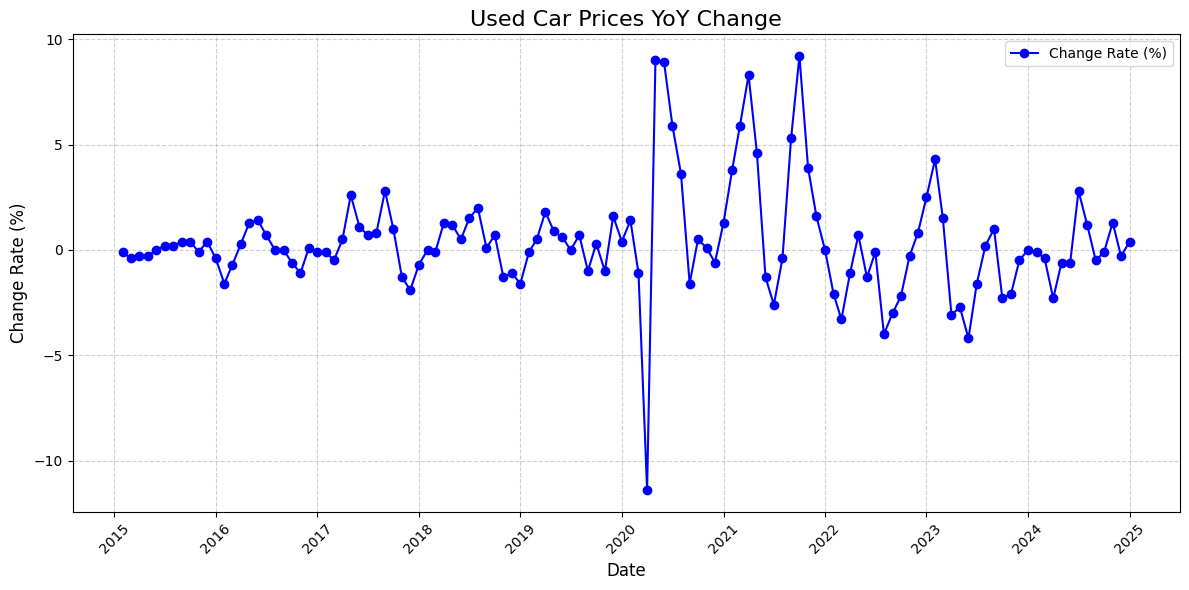

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Pandas DataFrame 생성
MoM_df = pd.DataFrame({"Date": MoM_dates, "Value": MoM_values})
MoM_df["Date"] = pd.to_datetime(MoM_df["Date"])  # 날짜 형식으로 변환

# 3. 시각화
plt.figure(figsize=(12, 6))
plt.plot(MoM_df["Date"], MoM_df["Value"], marker="o", linestyle="-", color="b", label="Change Rate (%)")

# 그래프 제목 및 축 레이블 설정
plt.title("Used Car Prices MoM Change", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Change Rate (%)", fontsize=12)

# x축 레이블 회전 및 간격 조정
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# 범례 추가
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

# YoY

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from datetime import datetime  # 날짜 변환을 위한 모듈

# 1. 웹 드라이버 설정
driver = webdriver.Chrome()
driver.get('https://tradingeconomics.com/united-states/used-car-prices-yoy')

# 2. 페이지 로드 대기
WebDriverWait(driver, 20).until(
    EC.presence_of_element_located((By.CLASS_NAME, "highcharts-series"))
)

# 3. "10Y" 버튼 클릭
ten_year_button = driver.find_element(By.CSS_SELECTOR, "a[data-span_str='10Y']")
ten_year_button.click()
time.sleep(3)  # 데이터 업데이트 대기

# 4. Highcharts 데이터 추출 (JavaScript 방식)
YoY_chart_data = driver.execute_script("""
    return Highcharts.charts[0].series[0].data.map(point => {
        return { x: point.category, y: point.y };
    });
""")

YoY_dates = [datetime.utcfromtimestamp(int(point['x']) // 1000).strftime('%Y-%m-%d') for point in YoY_chart_data]
YoY_values = [point['y'] for point in YoY_chart_data]

# 브라우저 종료
driver.quit()


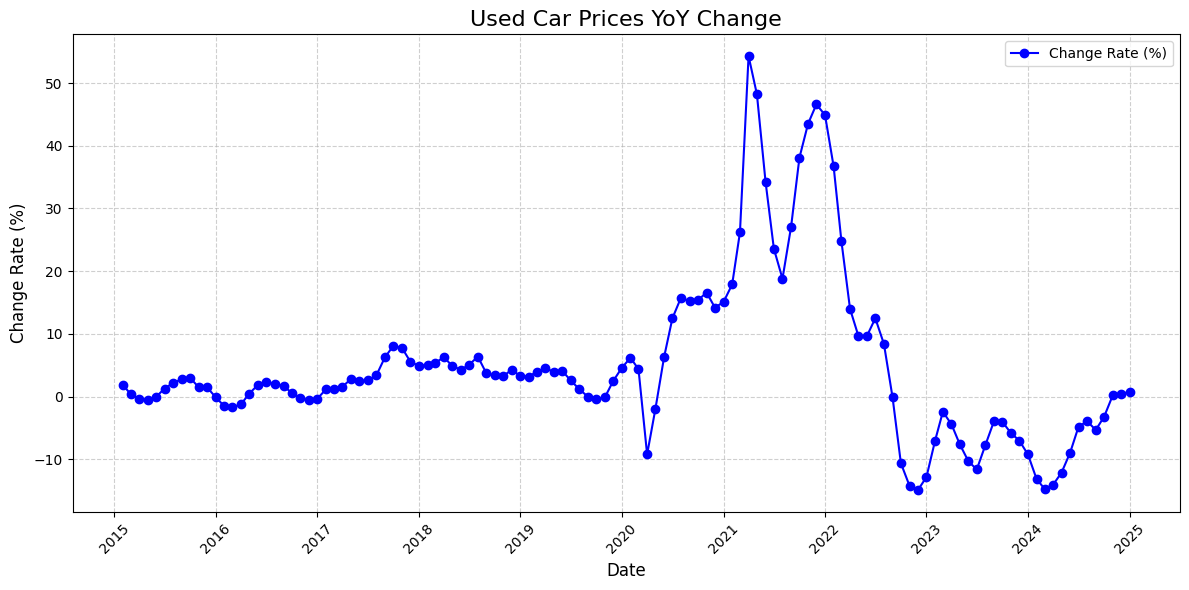

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Pandas DataFrame 생성
YoY_df = pd.DataFrame({"Date": YoY_dates, "Value": YoY_values})
YoY_df["Date"] = pd.to_datetime(YoY_df["Date"])  # 날짜 형식으로 변환

# 3. 시각화
plt.figure(figsize=(12, 6))
plt.plot(YoY_df["Date"], YoY_df["Value"], marker="o", linestyle="-", color="b", label="Change Rate (%)")

# 그래프 제목 및 축 레이블 설정
plt.title("Used Car Prices YoY Change", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Change Rate (%)", fontsize=12)

# x축 레이블 회전 및 간격 조정
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

# 범례 추가
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

# DB save

In [7]:
import pandas as pd
import mysql.connector
from mysql.connector import Error


# 2. MySQL 데이터베이스 연결 설정
try:
    connection = mysql.connector.connect(
        host='192.168.0.163',
        port=3306,
        database='analysis',   # 데이터베이스 이름
        user='root',       # 사용자 이름
        password='andong1234'
    )

    if connection.is_connected():
        cursor = connection.cursor()

        # 3. 테이블 생성 (존재하지 않을 경우에만 생성)
        create_table_query = '''
        CREATE TABLE IF NOT EXISTS stage_car (
            car_id INT AUTO_INCREMENT PRIMARY KEY,
            comparison_period VARCHAR(10),
            price_change_rate FLOAT,
            car_date DATE
        );
        '''
        cursor.execute(create_table_query)
        print("Table `stage_car` is ready.")

        # 4. MoM_df 데이터를 삽입
        for _, row in MoM_df.iterrows():
            insert_query = '''
            INSERT INTO stage_car (comparison_period, price_change_rate, car_date)
            VALUES (%s, %s, %s);
            '''
            cursor.execute(insert_query, ('MoM', row['Value'], row['Date']))

        # 5. YoY_df 데이터를 삽입
        for _, row in YoY_df.iterrows():
            insert_query = '''
            INSERT INTO stage_car (comparison_period, price_change_rate, car_date)
            VALUES (%s, %s, %s);
            '''
            cursor.execute(insert_query, ('YoY', row['Value'], row['Date']))

        # 변경 사항 커밋
        connection.commit()
        print("Data has been successfully inserted into the database.")

except Error as e:
    print(f"Error while connecting to MySQL: {e}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed.")

Table `stage_car` is ready.
Data has been successfully inserted into the database.
MySQL connection is closed.


In [8]:
MoM_df

,Date,Value
0,2015-02-01,-0.1
1,2015-03-01,-0.4
2,2015-04-01,-0.3
3,2015-05-01,-0.3
4,2015-06-01,0.0
...,...,...
115,2024-09-01,-0.5
116,2024-10-01,-0.1
117,2024-11-01,1.3
118,2024-12-01,-0.3


In [9]:
YoY_df

,Date,Value
0,2015-02-01,1.9
1,2015-03-01,0.4
2,2015-04-01,-0.3
3,2015-05-01,-0.5
4,2015-06-01,0.0
...,...,...
115,2024-09-01,-5.3
116,2024-10-01,-3.2
117,2024-11-01,0.2
118,2024-12-01,0.4
